<a href="https://colab.research.google.com/github/diegoturenne/Application-Oriented-Deep-Learning-Course-2022-UU/blob/main/Copy_of_Exercise_6_2_KERAS_complicated_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data

In [ ]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [ ]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.standard_normal(xtrain.shape)  # train data includes some noise

In [ ]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 1)


Simulate test data

In [ ]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [ ]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [ ]:
nb_nodes = 100 
nb_layers = 5
activation = "relu"
# we create 5 layers with 100 nodes each, and all of them are relu activated 

model = keras.models.Sequential(name="1Dfit")
for i in range(1, nb_layers):
  model.add(layers.Dense(nb_nodes, activation=activation, input_dim=xtrain.shape[1]))  # first layer
#forgot to add a regulariser !!! 
# or a dropout layer ... 


model.add(layers.Dense(1))  # final layer

print(model.summary())

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               200       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001) 

# we use the adam optimzer according to the documentation: 
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# so basically some sort of gradient decent with learning rate 0.001

model.compile(loss="MSE", optimizer=adam)
#we use the MSE: mean square error to calculate how far the predicted data is from the calculated data.

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [ ]:
epochs = 100 # in the video, 100 epochs seemed good.... 
save_period = 20  # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/100
157/157 [==============================] - 4s 4ms/step - loss: 4.6334
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 3.4765
Epoch 3/100
157/157 [==============================] - 1s 3ms/step - loss: 3.0779
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: 2.8199
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 2.6554
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 2.4929
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 2.4674
Epoch 8/100
157/157 [==============================] - 0s 3ms/step - loss: 2.3319
Epoch 9/100
157/157 [==============================] - 0s 3ms/step - loss: 2.3037
Epoch 10/100
157/157 [==============================] - 0s 3ms/step - loss: 2.2468
Epoch 11/100
157/157 [==============================] - 0s 3ms/step - loss: 2.2297
Epoch 12/100
157/157 [==============================] - 0s 3ms/step - loss: 2.1568
Epoch 13/100


Compare the performance of the model during the training. You may use the skeleton below:

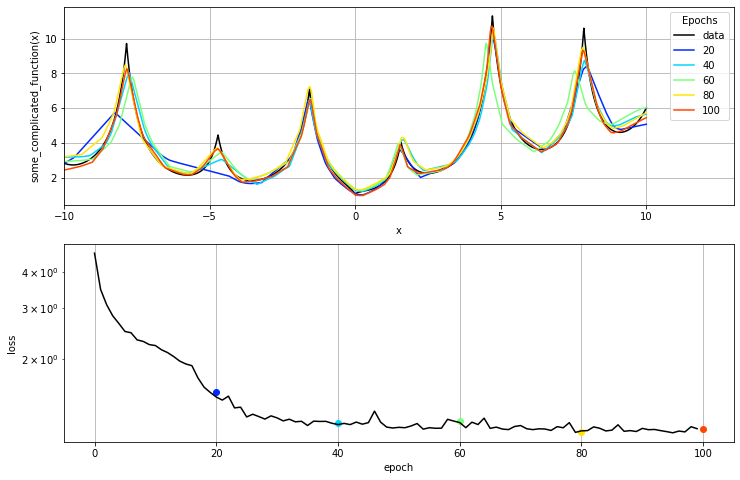

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()